In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import util
from scipy import stats
import seaborn as sns

# 1.0 Preprocessing

In [122]:
df_districts = gp.read_file("../data/Council_Districts.geojson")
df20 = pd.read_csv('../data/2020_Building_Energy_Benchmarking.csv')
df20 = gp.GeoDataFrame(df20, geometry=gp.points_from_xy(df20.Longitude, df20.Latitude))
util.clean_districts(df20, df_districts)

df19 = pd.read_csv('../data/2019_Building_Energy_Benchmarking.csv')
df19 = gp.GeoDataFrame(df19, geometry=gp.points_from_xy(df19.Longitude, df19.Latitude))
util.clean_districts(df19, df_districts)

Building WATERWORKS OFFICE & MARINA 2353/ 4088803975 doesn't have a district POINT (-122.33895 47.63575) 
	 Found district 7 for WATERWORKS OFFICE & MARINA
Building NAUTICAL LANDING 2381/ 4088804350 doesn't have a district POINT (-122.34219 47.64306) 
	 Found district 7 for NAUTICAL LANDING
Building UNION HARBOR CONDOMINIUM 2540/ 8807200000 doesn't have a district POINT (-122.33003 47.6401) 
	 Found district 4 for UNION HARBOR CONDOMINIUM
Building THE PIER AT LESCHI 2997/ 6780900000 doesn't have a district POINT (-122.28563 47.59926) 
	 Found district 3 for THE PIER AT LESCHI
Building THE LAKESHORE 3046/ 1180001715 doesn't have a district POINT EMPTY 
Building EDUCARE 3218/ 2895800030 doesn't have a district POINT EMPTY 
Building WATERWORKS OFFICE & MARINA 2373/ 4088803975 doesn't have a district POINT (-122.33895 47.63575) 
	 Found district 7 for WATERWORKS OFFICE & MARINA
Building NAUTICAL LANDING 2402/ 4088804350 doesn't have a district POINT (-122.34219 47.64306) 
	 Found district 

In [52]:
df_amazon = pd.read_csv("Amazon\\amazon_non_grocery.csv")
amazon_ids = df_amazon['OSEBuildingID']

In [20]:
amazon_19 = df19[df19['OSEBuildingID'].isin(amazon_ids)]
amazon_20 = df20[df20['OSEBuildingID'].isin(amazon_19['OSEBuildingID'])]
print(len(amazon_19), len(amazon_20))

31 31


## Amazon and District 1

While we don't have enough data to make any claims of statistical significance for Amazon, we do see a 12% decrease in total emissions for buildings owned by or affiliated with the company. 

For all of District 1, however, we can make some more interesting claims. There's a similar 12% decrease in total emissions from 2019 to 2020. Here, we have enough samples to call this decrease statistically significant!

In [117]:
# % change = change/original
change = amazon_19['TotalGHGEmissions'].sum()-amazon_20['TotalGHGEmissions'].sum()
original = amazon_19['TotalGHGEmissions'].sum()
print(change/original)
print(len(amazon_19))

0.11951458327151865
31


In [29]:
change_d1 = df19[df19['CouncilDistrictCode']==1]['TotalGHGEmissions'].sum()-df20[df20['CouncilDistrictCode']==1]['TotalGHGEmissions'].sum()
original_d1 = df19[df19['CouncilDistrictCode']==1]['TotalGHGEmissions'].sum()
print(change_d1/original_d1)

0.1235277163054048


(array([ 1.,  2.,  1.,  3.,  3., 21.,  4.,  0.,  0.,  2.]),
 array([-310.3 , -252.32, -194.34, -136.36,  -78.38,  -20.4 ,   37.58,
          95.56,  153.54,  211.52,  269.5 ]),
 <BarContainer object of 10 artists>)

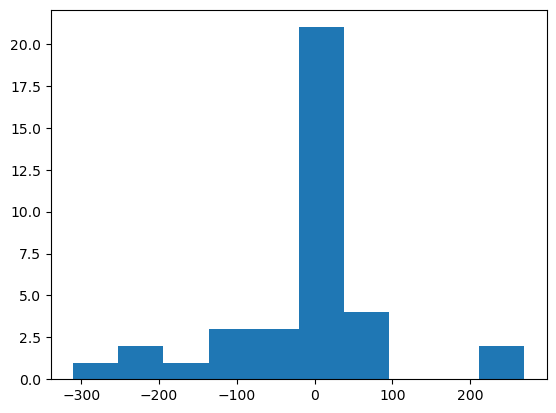

In [118]:
df19_d1 = df19[df19['CouncilDistrictCode']==1]
df20_d1 = df20[df20['CouncilDistrictCode']==1]
df20_d1 = df20_d1[df20_d1['OSEBuildingID'].isin(df19_d1['OSEBuildingID'])]
df19_d1 = df19_d1[df19_d1['OSEBuildingID'].isin(df20_d1['OSEBuildingID'])]
plt.hist(df19_d1['TotalGHGEmissions']-df20_d1['TotalGHGEmissions'])

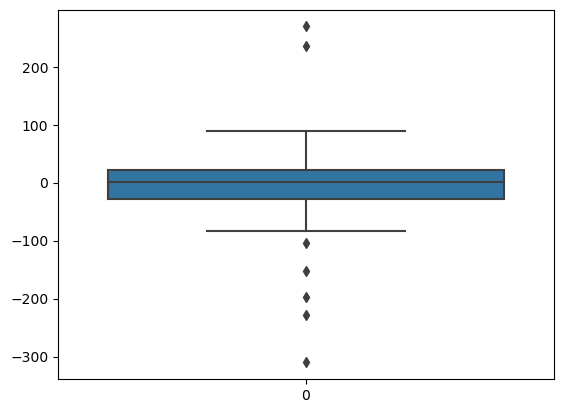

In [119]:
chart = sns.boxplot(data=[df19_d1["TotalGHGEmissions"]-df20_d1["TotalGHGEmissions"]])

In [94]:
df19_d1['TotalGHGEmissions'].describe()

count     293.000000
mean       69.534471
std       172.242814
min         0.000000
25%         5.700000
50%        23.200000
75%        64.300000
max      2030.100000
Name: TotalGHGEmissions, dtype: float64

In [95]:
df20_d1['TotalGHGEmissions'].describe()

count     291.000000
mean       59.987285
std       135.220496
min         0.000000
25%         5.300000
50%        21.400000
75%        61.200000
max      1760.600000
Name: TotalGHGEmissions, dtype: float64

### paired t-test: District 1
h0: d = 0, where d = the difference in distribution between (2020-2019) ie. there's no difference in the distributions from 2020 to 2019. 

h1: d < 0, ie. the distribution of total emissions in 2020 is less than 2019. 

reject the null if p < alpha = 0.05. 

n = 293 > 30 so don't need to worry about the normality assumption. 

p = 0.02 < 0.05 so we can reject h0 that d = 0, ie. that there's no difference between the distribution of GHG emissions between the years 2020 and 2019.

In [92]:
stats.ttest_rel(a=df20_d1['TotalGHGEmissions'], b=df19_d1['TotalGHGEmissions'], nan_policy='omit', alternative='less')

Ttest_relResult(statistic=-2.0349211401544527, pvalue=0.02138406086764513)

# City-Wide Pandemic Changes

Okay, but what about the city as a whole? If emissions went up at home then it doesn't make too much of a difference because those emissions would have gone from the offices to the homes, along with the workers.  

There is a 47% (!!) decrease in total GHGE emissions from 2019-2020 during the pandemic. Can't claim statistical significance this time, though, because of a much larger sample size (maybe?)

In [146]:
df20 = df20[df20['OSEBuildingID'].isin(df19['OSEBuildingID'])]
df19 = df19[df19['OSEBuildingID'].isin(df20['OSEBuildingID'])]

change = df19['TotalGHGEmissions'].sum()-df20['TotalGHGEmissions'].sum()
original = df19['TotalGHGEmissions'].sum()
print(change/original)

0.468140967656406


In [164]:
print(df19.idxmax(axis='columns', numeric_only=True))
print("\n\n",df19.iloc[547])

0         SiteEnergyUse(kBtu)
1         SiteEnergyUse(kBtu)
2         SiteEnergyUse(kBtu)
3         SiteEnergyUse(kBtu)
4         SiteEnergyUse(kBtu)
                ...          
3576         PropertyGFATotal
3577      SiteEnergyUse(kBtu)
3578    SiteEnergyUseWN(kBtu)
3579    SiteEnergyUseWN(kBtu)
3580      SiteEnergyUse(kBtu)
Length: 3530, dtype: object


 OSEBuildingID                                              763
DataYear                                                  2019
BuildingName                                     MARKET SQUARE
BuildingType                                    NonResidential
TaxParcelIdentificationNumber                       7666202405
Address                                       1415 WESTERN AVE
City                                                   SEATTLE
State                                                       WA
ZipCode                                                98101.0
Latitude                                              47.60765
Longitude

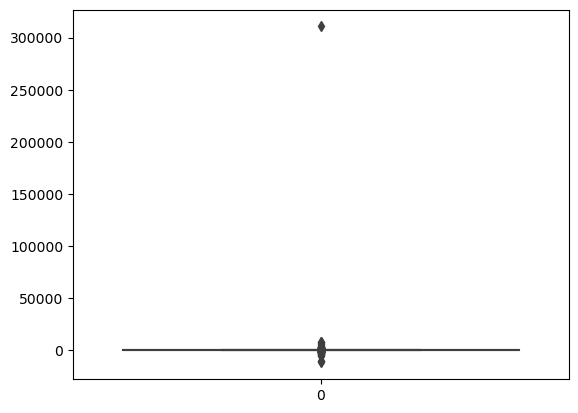

In [150]:
chart = sns.boxplot(data=df19['TotalGHGEmissions']-df20['TotalGHGEmissions'])

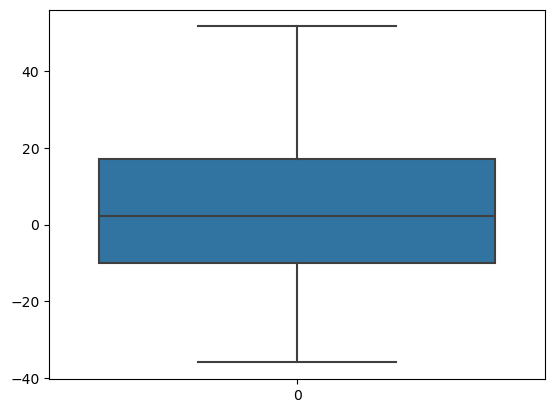

In [147]:
diff = df19["TotalGHGEmissions"]-df20["TotalGHGEmissions"]
diff = diff.dropna()
diff = list(filter(lambda x: x < diff.quantile(0.75) and x > diff.quantile(0.25), diff))
chart = sns.boxplot(data=diff)

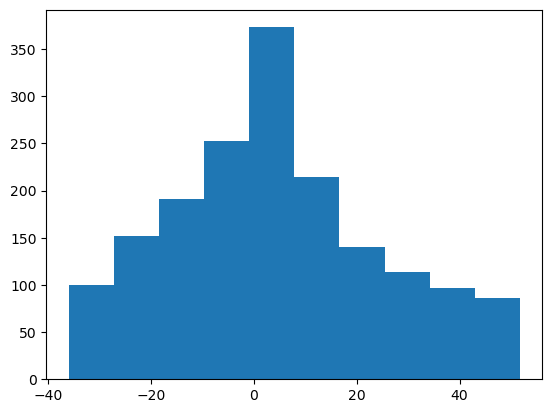

In [145]:
plt.hist(diff)
plt.show()

In [148]:
# Removing the outer quantiles/ outliers makes for a pretty normal distribution. So who was the massive drop earlier? 

## paired t-test: City-Wide
h0: d = 0, where d = the difference in distribution between (2020-2019) ie. there's no difference in the distributions from 2020 to 2019. 

h1: d < 0, ie. the distribution of total emissions in 2020 is less than 2019. 

reject the null if p < alpha = 0.05. 

n = 293 > 30 so don't need to worry about the normality assumption. 

p = 0.14 > 0.05 so we CANNOT reject h0 that d = 0, ie. there's no difference in the distribution of GHGE emissions between 2019 and 2020. 

In [125]:
stats.ttest_rel(a=df20['TotalGHGEmissions'], b=df19['TotalGHGEmissions'], nan_policy='omit', alternative='less')

Ttest_relResult(statistic=-1.0858298683348566, pvalue=0.13881454569112878)